In [ ]:
# CCA --> Complete Create Analysis

# df --> misssing data --> filter missing data --->
# new_df  = filterred_columns_in_which_we_have_missing_data

# new_df ---> missing_data_drop

# Architecture --> Histogram --->
# past column in which we have missing data
# updated column in which we have no missing data
# if past data architecture is overlap to new data architecture ---> it means we can drop missing data
# if past data architecture is not overlap to new data architecture ---> it means we can not drop missing data

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("dsjob - dsjob.csv")

In [3]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [4]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     0.000000
gender                    23.860968
relevent_experience        0.000000
enrolled_university        1.456083
education_level            2.442461
major_discipline          14.654767
experience                 0.234852
company_size              29.215594
company_type              29.779239
last_new_job               1.878816
training_hours             0.000000
dtype: float64

In [4]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols

['enrolled_university', 'education_level', 'experience', 'last_new_job']

In [5]:
df[cols].sample(5)

,enrolled_university,education_level,experience,last_new_job
1414,no_enrollment,Masters,11,>4
1273,no_enrollment,Graduate,13,1
2066,NaN,Masters,9,2
72,no_enrollment,Masters,>20,4
589,no_enrollment,Graduate,3,2


In [6]:
len(df[cols].dropna()) / len(df)

0.9478628464067638

In [7]:
new_df = df[cols].dropna()
df.shape, new_df.shape

((2129, 13), (2018, 4))

In [8]:
import matplotlib.pyplot as plt

<Axes: >

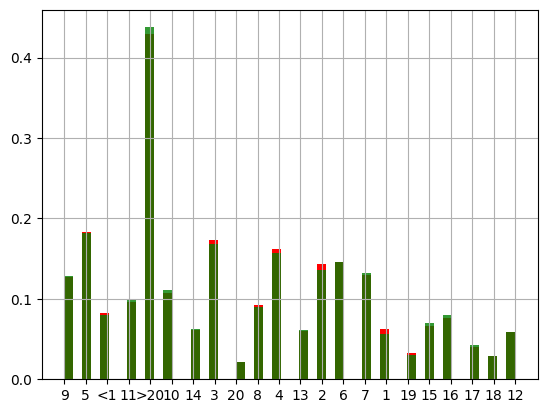

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['experience'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

In [10]:
temp = pd.concat([
            # percentage of observation per category, original data
            df['enrolled_university'].value_counts() / len(df),

            # percentage of observation per category, cca data
            new_df['enrolled_university'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
enrolled_university,,
no_enrollment,0.713481,0.727948
Full time course,0.204321,0.202180
Part time course,0.067637,0.069871
